In [1]:
import os, sys
import uproot, awkward
import ROOT as rt
import numpy as np
from array import array
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

Welcome to JupyROOT 6.26/02


In [2]:
save_dir = "with_shield"
events_in_this_sim = 190.0e6
livetime = (events_in_this_sim/50.0e6)*21.8
print('Total livetime = %0.3f sec'%(livetime))

Total livetime = 82.840 sec


In [3]:
dir_ = '/Users/shubhampandey/work/geant4/k100sim_anthony/sim_files'
inFile_k100 = '%s/sim_190M_PuBe_sourceAndshields_boronBox_walls_floor_boronShield_V6H6_1inch_withFlags.root'%(dir_)


file_k100 = uproot.open(inFile_k100)
if(not file_k100):
    print("could not open file: %s"%(inFile_k100))
    sys.exit(0)

tree_k100 = file_k100["simtree"]

if(not tree_k100):
    print("simtree does not exist in file: %s"%(file_k100))
    sys.exit(0)

EV = tree_k100["EV"].array(library="np")
EV = EV - 1
Type = tree_k100["Type"].array(library="np")
E1 = tree_k100["E1"].array(library="np")
D3 = tree_k100["D3"].array(library="np")
DT = tree_k100["DT"].array(library="np")
nCap = tree_k100["nCap"].array(library="np")
time1 = tree_k100["time1"].array(library="np")

k100 = pd.DataFrame( {'EV' : EV,
                  'Type' : Type,
                  'E1' : E1,
                  'D3' : D3,
                      'DT' : DT,
                     'nCap' : nCap,
                     'time1' : time1}
                 )
k100['Edep'] = k100.D3.map(sum)
k100['flag'] = k100.nCap.map(sum).astype(bool)
k100['TS'] = tree_k100["TS"].array(library="np")
k100.head(5)

,EV,Type,E1,D3,DT,nCap,time1,Edep,flag,TS
0,166,"[2112, 22, 22, 11, 11, 11, 11, 11, 11, 11, 22,...","[2.3117123e-05, 0.47759342, 0.18271975, 2.762e...","[0.0, 0.0, 0.00011346, 2.762e-05, 2.826e-05, 3...","[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[12994.69, 13463.884, 13463.887, 13463.887, 13...",0.477593,False,"[100040, 2600004, 2600005, 3800001, 3700001, 3..."
1,174,"[22, 11, 11, 11, 11, 11, 11]","[0.1727997, 2.762e-05, 2.94e-05, 0.0001695, 0....","[8.282e-05, 2.762e-05, 2.94e-05, 0.0001695, 0....","[2013, 2013, 2013, 2013, 2013, 2013, 2013]","[0, 0, 0, 0, 0, 0, 0]","[24.067944, 24.067944, 24.067944, 24.067944, 2...",0.172800,False,"[500015, 2600001, 2500001, 2400001, 2300001, 2..."
2,366,"[22, 22, 22]","[2.223048, 2.223048, 2.223048]","[0.0, 0.0, 0.0]","[2020, 2019, 2018]","[0, 0, 0]","[489024.4, 489024.78, 489024.8]",0.000000,False,"[13700006, 13700008, 13700010]"
3,565,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 22, 1...","[0.477602, 1.624e-05, 2.826e-05, 2.648e-05, 3....","[0.0001589, 1.624e-05, 2.826e-05, 2.648e-05, 3...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[360157.6, 360157.6, 360157.6, 360157.6, 36015...",0.477602,False,"[16900004, 18100001, 18000001, 17900001, 17800..."
4,575,"[22, 22, 22, 11, 11]","[0.7827267, 0.473947, 0.40591955, 0.06802745, ...","[0.0, 0.0, 0.0, 0.06802745, 0.3087797]","[2020, 2020, 2020, 2020, 2020]","[0, 0, 0, 0, 0]","[2578122.8, 2578122.8, 2578123.0, 2578122.8, 2...",0.376807,False,"[10500006, 10500007, 10500008, 10700001, 10600..."


In [4]:
def tile_energy(df_):
    #a = (np.dstack((df_.DT,df_.D3)))[0]
    a = (np.dstack((df_.DT,df_.D3,df_.time1)))[0]
    #print (a)
    temp = {}
    for i in a:
        if(i[2] > 1.e11):
            continue
        if(i[0] == 1):
            continue
        if(i[0] in temp):
            temp[i[0]] += i[1]
        else:
            temp[i[0]] = i[1]
    #print (temp)
    return np.array([temp[i] for i in temp.keys()])

In [5]:
k100['tile_energy'] = k100.apply(tile_energy,axis=1)

In [6]:
tiles = [i for i in range(1,24)]
detids = np.concatenate(([i for i in range(2001,2021)],[1001,1002,1003]))
det_map = {}
for j in range(1,24):
    det_map[detids[j-1]] = j

def tile_Edep(df_):
    combined = (np.dstack((df_.DT,df_.D3,df_.time1)))[0]
    detids = []
    temp = {}
    for i in tiles:
        temp[i] = 0.
    #print (temp)
    for i in combined:
        if(i[2] > 1.e11):
            continue
        if(i[0] == 1):
            continue
        temp[det_map[i[0]]] += i[1]
    return np.array([temp[i] for i in temp.keys()])

In [7]:
k100['tile_Edep'] = k100.apply(tile_Edep,axis=1)

In [8]:
def Egamma(df_):
    indices = np.where(df_.Type == 22)[0]
    energy = []
    gammas = {}
    for i in indices:
        #print(df_.TS)
        track = int((df_.TS)[i]/1e5)
        if(not (track in gammas)):
            gammas[track] = 'yolo'+str(track)
            energy.append((df_.E1)[i])
    return energy

In [9]:
k100['Egamma'] = k100.apply(Egamma,axis=1)

In [10]:
def nCap_isoTope(df_):
    if(df_.flag == 0):
        if(76 in ([int(i*10) for i in (df_.Egamma)])):
            return 57026
        else:
            return -1
    else:
        index = np.where(df_.nCap ==1)[0][0]
        return (df_.Type)[index+1]

In [11]:
k100['nCapType'] = k100.apply(nCap_isoTope,axis=1)

In [80]:
np.dstack((k100.iloc[0].DT,k100.iloc[0].D3,k100.iloc[0].time1))[0]
# a = np.array([i for i in range(2001,2021)])
# b = np.array([1001,1002,1002])
# np.concatenate((a,b))
#np.concatenate(([i for i in range(2001,2021)],[1001,1002,1003]))


array([[2.01900000e+03, 0.00000000e+00, 1.29946904e+04],
       [2.01900000e+03, 0.00000000e+00, 1.34638838e+04],
       [2.01900000e+03, 1.13460002e-04, 1.34638867e+04],
       [2.01900000e+03, 2.76200008e-05, 1.34638867e+04],
       [2.01900000e+03, 2.82599995e-05, 1.34638867e+04],
       [2.01900000e+03, 3.89999987e-05, 1.34638867e+04],
       [2.01900000e+03, 2.82599995e-05, 1.34638867e+04],
       [2.01900000e+03, 1.59100000e-05, 1.34638867e+04],
       [2.01900000e+03, 2.72300003e-05, 1.34638867e+04],
       [2.01900000e+03, 3.61720013e-04, 1.34638867e+04],
       [2.01900000e+03, 1.61079995e-04, 1.34638867e+04],
       [2.01900000e+03, 2.76200008e-05, 1.34638867e+04],
       [2.01900000e+03, 2.76200008e-05, 1.34638867e+04],
       [2.01900000e+03, 3.89999987e-05, 1.34638867e+04],
       [2.01900000e+03, 1.80200004e-05, 1.34638867e+04],
       [2.01900000e+03, 3.89999987e-05, 1.34638867e+04],
       [2.01900000e+03, 3.89999987e-05, 1.34638867e+04],
       [2.01900000e+03, 1.76899

In [10]:
indices = np.where(k100[k100.EV == 166].Type.explode() == 22)[0]
[int((k100[k100.EV == 166].TS.explode()).iloc[i]/1e5) for i in indices]

[26, 26, 31, 30]

In [89]:
k100.head(5)

,EV,Type,E1,D3,DT,nCap,time1,Edep,flag,TS,tile_energy,Egamma,nCapType,tile_Edep
0,166,"[2112, 22, 22, 11, 11, 11, 11, 11, 11, 11, 22,...","[2.3117123e-05, 0.47759342, 0.18271975, 2.762e...","[0.0, 0.0, 0.00011346, 2.762e-05, 2.826e-05, 3...","[2019, 2019, 2019, 2019, 2019, 2019, 2019, 201...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[12994.69, 13463.884, 13463.887, 13463.887, 13...",0.477593,False,"[100040, 2600004, 2600005, 3800001, 3700001, 3...",[0.4775934128301742],"[0.47759342, 0.00421604, 0.0283065]",-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,174,"[22, 11, 11, 11, 11, 11, 11]","[0.1727997, 2.762e-05, 2.94e-05, 0.0001695, 0....","[8.282e-05, 2.762e-05, 2.94e-05, 0.0001695, 0....","[2013, 2013, 2013, 2013, 2013, 2013, 2013]","[0, 0, 0, 0, 0, 0, 0]","[24.067944, 24.067944, 24.067944, 24.067944, 2...",0.172800,False,"[500015, 2600001, 2500001, 2400001, 2300001, 2...",[0.17279971121206472],[0.1727997],-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,366,"[22, 22, 22]","[2.223048, 2.223048, 2.223048]","[0.0, 0.0, 0.0]","[2020, 2019, 2018]","[0, 0, 0]","[489024.4, 489024.78, 489024.8]",0.000000,False,"[13700006, 13700008, 13700010]","[0.0, 0.0, 0.0]",[2.223048],-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,565,"[22, 11, 11, 11, 11, 11, 11, 11, 11, 11, 22, 1...","[0.477602, 1.624e-05, 2.826e-05, 2.648e-05, 3....","[0.0001589, 1.624e-05, 2.826e-05, 2.648e-05, 3...","[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[360157.6, 360157.6, 360157.6, 360157.6, 36015...",0.477602,False,"[16900004, 18100001, 18000001, 17900001, 17800...",[0.4776020107765362],"[0.477602, 0.0286095]",-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,575,"[22, 22, 22, 11, 11]","[0.7827267, 0.473947, 0.40591955, 0.06802745, ...","[0.0, 0.0, 0.0, 0.06802745, 0.3087797]","[2020, 2020, 2020, 2020, 2020]","[0, 0, 0, 0, 0]","[2578122.8, 2578122.8, 2578123.0, 2578122.8, 2...",0.376807,False,"[10500006, 10500007, 10500008, 10700001, 10600...",[0.3768071383237839],[0.7827267],-1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [12]:
k100[(k100.Edep > 6) & (k100.Edep < 8) & (k100.nCapType != 128053)].nCapType.value_counts()

-1        9271
 57026    3150
 24011      96
 23010       5
 20009       4
Name: nCapType, dtype: int64

In [25]:
gamma_energy = k100[(k100.Edep > 6) & (k100.Edep < 8)].Egamma.explode()

Warning in <TROOT::Append>: Replacing existing TH1: h_gamma_energy (Potential memory leak).


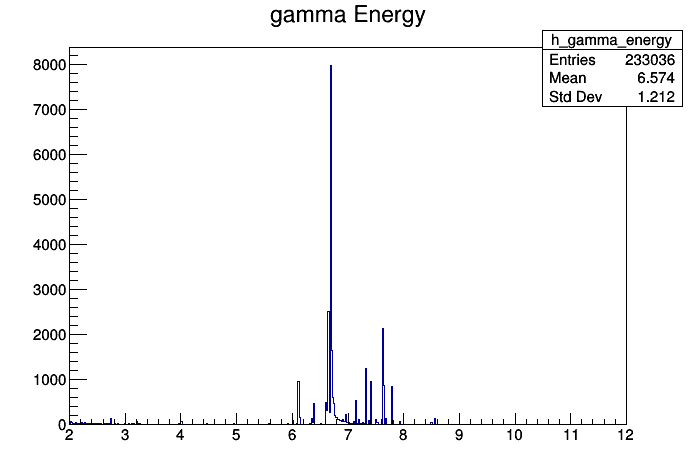

In [29]:
gamma_energy = k100[(k100.Edep > 6) & (k100.Edep < 8)].Egamma.explode()
h_gamma_energy = rt.TH1F("h_gamma_energy","gamma Energy",500,2,12)
h_gamma_energy.Sumw2()

for energy in gamma_energy:
#     temp = int(energy*10)
#     if(temp == 76):
#         continue
    h_gamma_energy.Fill(energy)
    
c = rt.TCanvas()
h_gamma_energy.Draw('hist')
rt.gStyle.SetOptStat(1111)
#rt.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_gamma_energy (Potential memory leak).


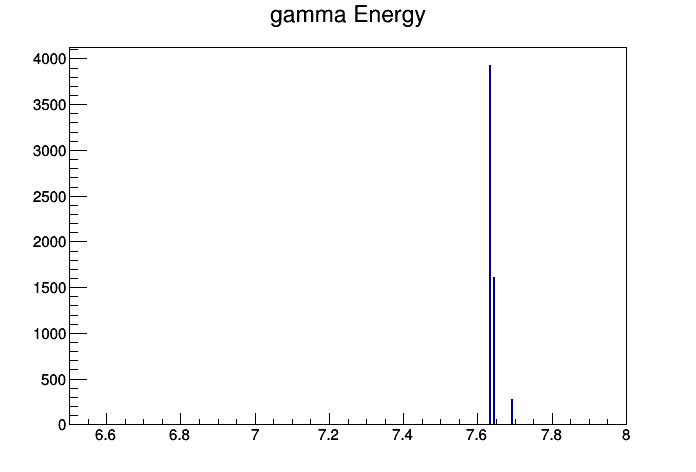

In [90]:
#gamma_energy = k100[(k100.Edep > 6) & (k100.Edep < 8) & (k100.nCapType != 128053)].Egamma.explode()
gamma_energy = k100[(k100.nCapType == 57026)].Egamma.explode()
h_gamma_energy = rt.TH1F("h_gamma_energy","gamma Energy",500,6.5,8)
h_gamma_energy.Sumw2()

for energy in gamma_energy:
#     temp = int(energy*10)
#     if(temp == 76):
#         continue
    h_gamma_energy.Fill(energy)
    
c = rt.TCanvas()
h_gamma_energy.Draw('hist')
rt.gStyle.SetOptStat(1111)
#rt.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_k100sim_tile_energy (Potential memory leak).


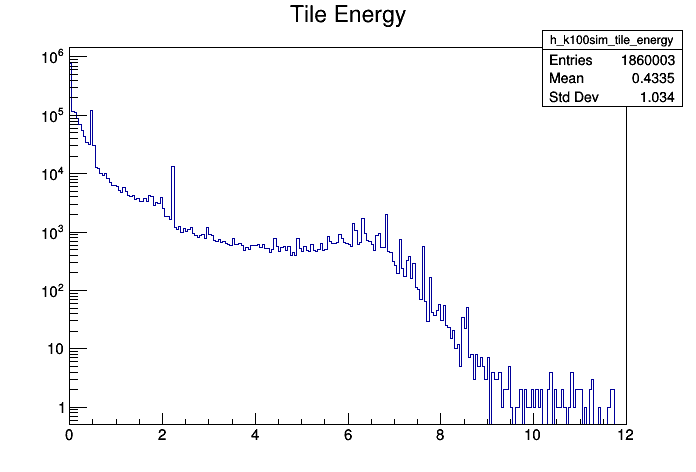

In [91]:
h_k100sim_tile_energy = rt.TH1F("h_k100sim_tile_energy","Tile Energy",240,0,12)
h_k100sim_tile_energy.Sumw2()
tileEnergy = k100.tile_energy.explode()
for energy in tileEnergy:
    h_k100sim_tile_energy.Fill(energy)
    
c = rt.TCanvas()
h_k100sim_tile_energy.Draw('hist')
rt.gPad.SetLogy()
c.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: h_k100sim_tile_energy_sansI127 (Potential memory leak).


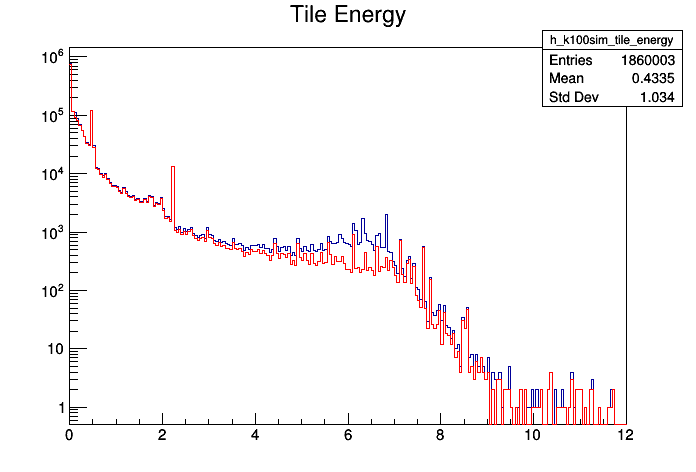

In [92]:
h_k100sim_tile_energy_sansI127 = rt.TH1F("h_k100sim_tile_energy_sansI127","Tile Energy sans I127",240,0,12)
h_k100sim_tile_energy_sansI127.Sumw2()
tileEnergy = k100[k100.nCapType != 128053].tile_energy.explode()

for energy in tileEnergy:
    h_k100sim_tile_energy_sansI127.Fill(energy)
    
c = rt.TCanvas()
h_k100sim_tile_energy.Draw('hist')
h_k100sim_tile_energy_sansI127.SetLineColor(rt.kRed)
h_k100sim_tile_energy_sansI127.Draw('hist same')
rt.gPad.SetLogy()
c.Draw()

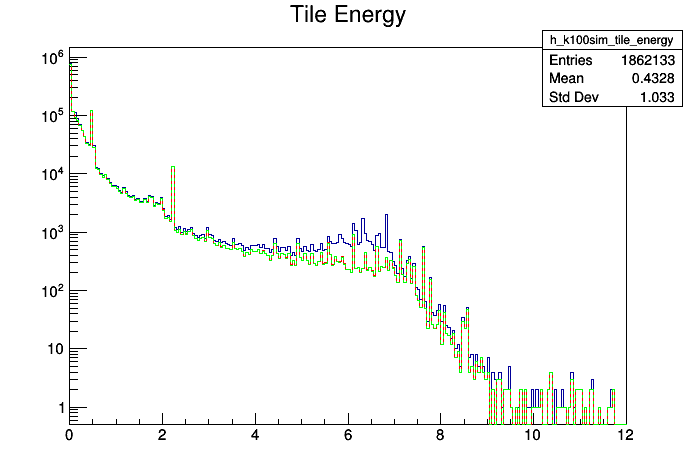

In [17]:
h_k100sim_tile_energy_sansI127_Na23 = rt.TH1F("h_k100sim_tile_energy_sansI127_Na23","Tile Energy sans I127 & Na23",240,0,12)
h_k100sim_tile_energy_sansI127_Na23.Sumw2()
tileEnergy = k100[(k100.nCapType != 128053) & (k100.nCapType != 24011)].tile_energy.explode()

for energy in tileEnergy:
    h_k100sim_tile_energy_sansI127_Na23.Fill(energy)
    
c = rt.TCanvas()
h_k100sim_tile_energy.Draw('hist')
h_k100sim_tile_energy_sansI127.SetLineColor(rt.kRed)
h_k100sim_tile_energy_sansI127.Draw('hist same')
h_k100sim_tile_energy_sansI127_Na23.SetLineColor(rt.kGreen)
h_k100sim_tile_energy_sansI127_Na23.SetLineStyle(2)
h_k100sim_tile_energy_sansI127_Na23.Draw('hist same')
rt.gPad.SetLogy()
c.Draw()

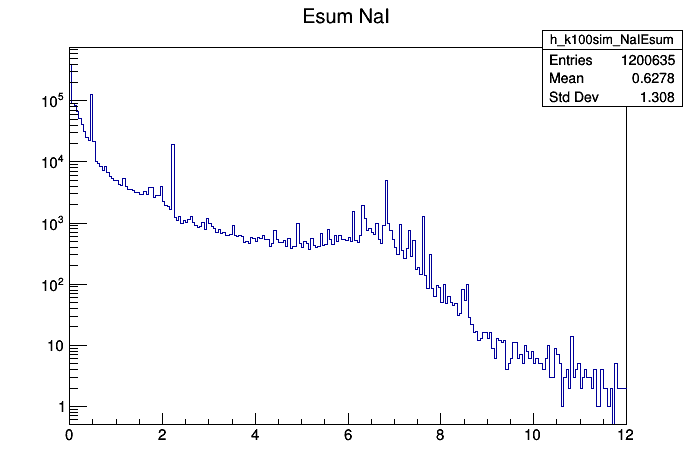

In [18]:
NaI_Esum = [np.sum(i) for i in k100.tile_energy]
h_k100sim_NaIEsum = rt.TH1F("h_k100sim_NaIEsum","Esum NaI",240,0,12)
h_k100sim_NaIEsum.Sumw2()

for energy in NaI_Esum:
    h_k100sim_NaIEsum.Fill(energy)
    
c = rt.TCanvas()
h_k100sim_NaIEsum.Draw('hist')
rt.gPad.SetLogy()
c.Draw()

In [12]:
df = pd.read_excel('./data_xlsx/r76_NaI_spectrum.xlsx')
df = df.drop(['Unnamed: 6','Unnamed: 10','samp t [s]','samp t [s].1'],axis=1)
df = df.dropna()

df = df.rename(columns={'lower (MeV)': 'lower', 
                        ' upper (MeV)': 'upper',
                        'center [MeV]': 'bin_center',
                        ' rate [Hz]':'all_rate', 
                        'error [MeV]':'all_error',
                       ' rate [Hz].1':'bkg_rate',
                       'error [MeV].1':'bkg_error',
                        ' rate [Hz].2':'signal_rate',
                       'error [MeV].2':'signal_error'})

In [13]:
df.columns

Index(['lower', 'upper', 'bin_center', 'all_rate', 'all_error', 'bkg_rate',
       'bkg_error', 'signal_rate', 'signal_error'],
      dtype='object')

In [14]:
df.head()


,lower,upper,bin_center,all_rate,all_error,bkg_rate,bkg_error,signal_rate,signal_error
2,0.10,0.15,0.125,473.430939,0.816581,231,2.774887,242.430939,2.892543
3,0.15,0.20,0.175,384.118317,0.735535,195.300003,2.551470,188.818314,2.655374
4,0.20,0.25,0.225,323.629669,0.675142,154.233322,2.267402,169.396347,2.365783
5,0.25,0.30,0.275,307.211212,0.657793,128.300003,2.068010,178.911209,2.170106
6,0.30,0.35,0.325,355.759155,0.707862,117.366669,1.977934,238.392486,2.100784


In [15]:
h_data = rt.TH1F("h_data","Energy deposited in NaI (data)",240,0,12)
h_data.Sumw2()

i = 3
while (i < h_data.GetNbinsX()):
#     if((i-3) > len(trigger_rate)):
#         break
    bincenter = round(h_data.GetBinCenter(i),3)
    if(i == 220):
        break
    
    df_center = round(df.bin_center.iloc[i-3],3)
    if(bincenter != df_center ):
    #if(bincenter != round( df.bin_center.iloc[i-3] ,3) ):
        print(i, ' : ' ,bincenter, ' : ', df.bin_center.iloc[i-3])
        break
    else:
        h_data.SetBinContent(i,df.signal_rate.iloc[i-3])
        h_data.SetBinError(i,df.signal_error.iloc[i-3])
    i += 1


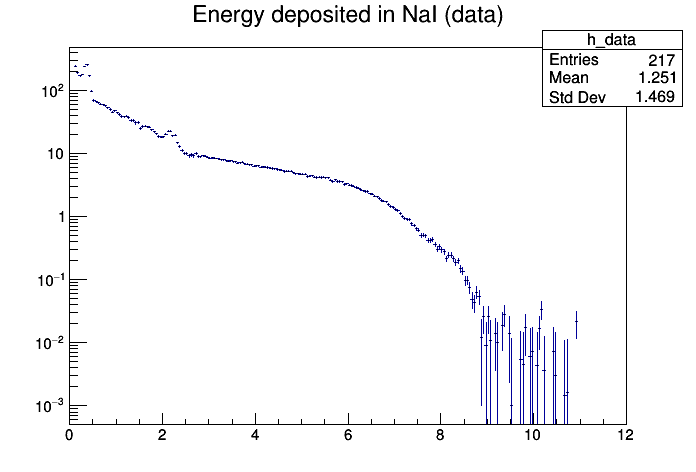

In [16]:
c = rt.TCanvas()
h_data.Draw()

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()

at 0.5 = 0.064
at 1.4 = 0.051
at 2.1 = 0.047
at 2.4 = 0.045


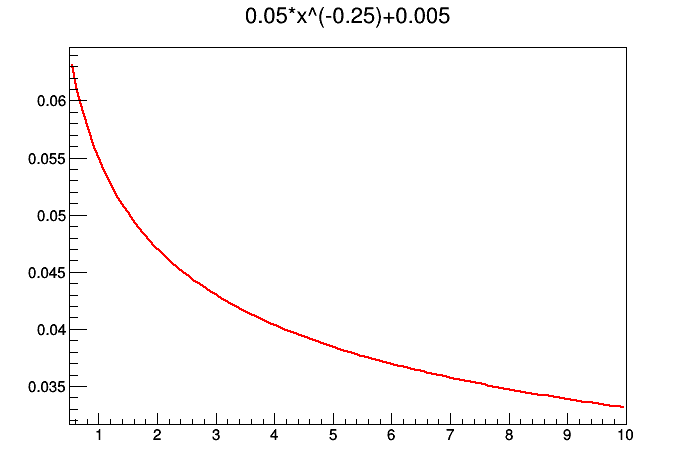

In [32]:
resoNaI = rt.TF1("resoNaI","0.05*x^(-0.25)+0.005",0.5,10)
c = rt.TCanvas()
resoNaI.Draw()
c.Draw()
print('at 0.5 = %0.3f'%(resoNaI.Eval(0.5)))
print('at 1.4 = %0.3f'%(resoNaI.Eval(1.4)))
print('at 2.1 = %0.3f'%(resoNaI.Eval(2.1)))
print('at 2.4 = %0.3f'%(resoNaI.Eval(2.4)))

In [17]:
def calculate_trigger(doSmearing):
    print ('Calculating trigger rate...')
    triggered_events = 0
    up_thresholds = [round(i,3) for i in np.arange(0.15,12.,0.05)]
    low_thresholds = [round(i,3) for i in np.arange(0.1,11.95,0.05)]
    mid = [round(i,3) for i in np.arange(0.125,11.975,0.05)]
    triggered_list = {}
    n = len(mid)
    trig_event_list = np.zeros(n)
    skipped_events = 0
    for threshold in mid:
        triggered_list['%f'%(threshold)] = 0


    rand = rt.TRandom3()
    resoNaI = rt.TF1("resoNaI","0.05*x^(-0.25)+0.005",0.5,10)
    for i in tqdm(range(len(k100))):
        temp_trigger = np.zeros(n)
        temp_veto = np.zeros(n)
        for energy in k100.tile_energy.iloc[i]:
            if(doSmearing):                
                smear = resoNaI.Eval(energy)
                smeared_energy = rand.Gaus(energy,energy*smear)
                if(smeared_energy < 0):
                    energy = 0.
                else:
                    energy = smeared_energy
            veto = False
            trigger = False

            for j,threshold in enumerate(up_thresholds):
                
                if(energy > threshold):
                    temp_veto[j] = True
                elif(energy > low_thresholds[j]):
                    temp_trigger[j] = True

        for j in range(n):
            if(not temp_veto[j] and temp_trigger[j]):
                triggered_list['%f'%(mid[j])] += 1
            #triggered_events += 1
    #         print('%d : %f'%(i,energy))
    #         break
#         print ('event = ',i)
#         print ('tile_energy = ',k100.tile_energy.iloc[i])
#         print ('trigger = ',temp_trigger)
#         print ('veto = ',temp_veto)

    
    #print (triggered_list)
#     print('Total trigger events = %d'%(triggered_list['3.125']))
#     print('Total trigger rate = %f Hz'%(triggered_list['3.125']/0.218))
    print('Skipped events = ',skipped_events)
    livetime = (events_in_this_sim - skipped_events) * (21.8/50e6)
    print ('Full livetime = %0.4f sec'%(events_in_this_sim*((21.8/50e6))))
    print ('After removal livetime = %0.4f sec'%(livetime))
    x = np.zeros(n)
    y = np.zeros(n)
    erry = np.zeros(n)
    for i,j in enumerate(triggered_list.keys()):
        x[i] = float(j)
        y[i] = (triggered_list[j])/livetime
        
        erry[i] = np.sqrt(triggered_list[j])/livetime
    return np.c_[np.c_[x,y],erry]

In [18]:
def makeHistogram(temp_hist,temp_trigger):
    i = 3
    while (i < temp_hist.GetNbinsX()):
        if((i-3) > len(temp_trigger)):
            break
        bincenter = round(temp_hist.GetBinCenter(i),3)
        if(bincenter != temp_trigger[i-3][0]):
            print(bincenter, ' : ', temp_trigger[i-3][0])
            break
        else:
            temp_hist.SetBinContent(i,temp_trigger[i-3][1])
            temp_hist.SetBinError(i,temp_trigger[i-3][2])
        i += 1
    return temp_hist   

In [20]:
trigger_rate_NoSmearing = calculate_trigger(False)

Calculating trigger rate...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1200635/1200635 [00:55<00:00, 21479.84it/s]


Skipped events =  0
Full livetime = 82.8400 sec
After removal livetime = 82.8400 sec


In [21]:
h_k100sim_bkg_NaI_Edep_all_NoSmearing = rt.TH1F("h_k100sim_bkg_NaI_Edep_all_NoSmearing","Trigger rate sim w/o smearing",240,0,12)
h_k100sim_bkg_NaI_Edep_all_NoSmearing.Sumw2()
h_k100sim_bkg_NaI_Edep_all_NoSmearing = makeHistogram(h_k100sim_bkg_NaI_Edep_all_NoSmearing,trigger_rate_NoSmearing)
# c = rt.TCanvas()
# h_k100sim_bkg_NaI_Edep_sansI127_smeared.Draw()
# rt.gPad.SetLogy()
# c.Draw()

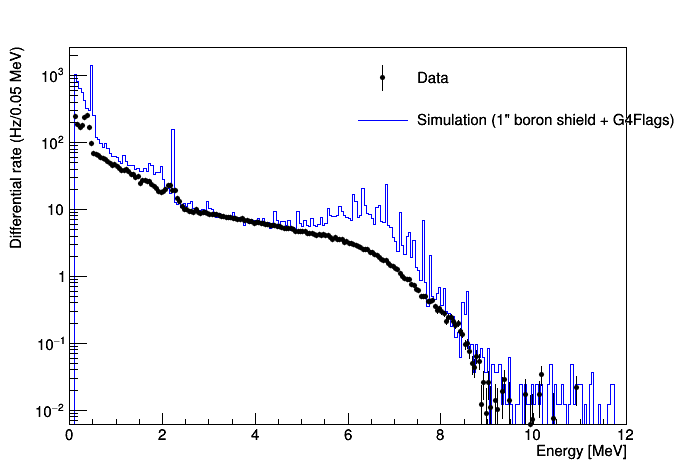

In [36]:
c = rt.TCanvas()
h_data.Draw()
h_data.SetMarkerStyle(rt.kFullCircle)
h_data.SetMarkerColor(rt.kBlack)
h_data.SetMarkerSize(0.6)
h_data.SetLineColor(rt.kBlack)
rt.gStyle.SetOptStat(0)
h_k100sim_bkg_NaI_Edep_all_NoSmearing.SetLineColor(rt.kBlue)
h_k100sim_bkg_NaI_Edep_all_NoSmearing.SetTitle("")
h_k100sim_bkg_NaI_Edep_all_NoSmearing.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_all_NoSmearing.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_all_NoSmearing.GetXaxis().SetRangeUser(0,12)
h_k100sim_bkg_NaI_Edep_all_NoSmearing.Draw('hist')
h_data.Draw('same')

legend = rt.TLegend(0.5,0.88,0.9,0.7)
legend.SetTextSize(0.035)
legend.SetBorderSize(0)
legend.AddEntry(h_data,'Data','pe')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_NoSmearing,'Simulation (1" boron shield + G4Flags)','l')
legend.Draw()


rt.gPad.SetLogy()
c.Draw()

In [30]:
trigger_rate_smeared = calculate_trigger(True)

Calculating trigger rate...


  0%|                                                                                                                                                                                                | 0/1200635 [00:00<?, ?it/s]/var/folders/x7/33tkj9dx0bzcnj7gh4sb5tlc0000gn/T/ipykernel_21836/60133477.py:23: RuntimeWarning: invalid value encountered in double_scalars
  smeared_energy = rand.Gaus(energy,energy*smear)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1200635/1200635 [01:21<00:00, 14699.55it/s]


Skipped events =  0
Full livetime = 82.8400 sec
After removal livetime = 82.8400 sec


In [31]:
h_k100sim_bkg_NaI_Edep_all_smeared = rt.TH1F("h_k100sim_bkg_NaI_Edep_all_smeared","Energy deposited in NaI (smeared)",240,0,12)
h_k100sim_bkg_NaI_Edep_all_smeared.Sumw2()
h_k100sim_bkg_NaI_Edep_all_smeared = makeHistogram(h_k100sim_bkg_NaI_Edep_all_smeared,trigger_rate_smeared)

# i = 3
# while (i < h_k100sim_bkg_NaI_Edep_all_smeared.GetNbinsX()):
#     if((i-3) > len(trigger_rate_smeared)):
#         break
#     bincenter = round(h_k100sim_bkg_NaI_Edep_all_smeared.GetBinCenter(i),3)
#     if(bincenter != trigger_rate_smeared[i-3][0]):
#         print(bincenter, ' : ', trigger_rate_smeared[i-3][0])
#         break
#     else:
#         h_k100sim_bkg_NaI_Edep_all_smeared.SetBinContent(i,trigger_rate_smeared[i-3][1])
#         h_k100sim_bkg_NaI_Edep_all_smeared.SetBinError(i,trigger_rate_smeared[i-3][2])
#     i += 1

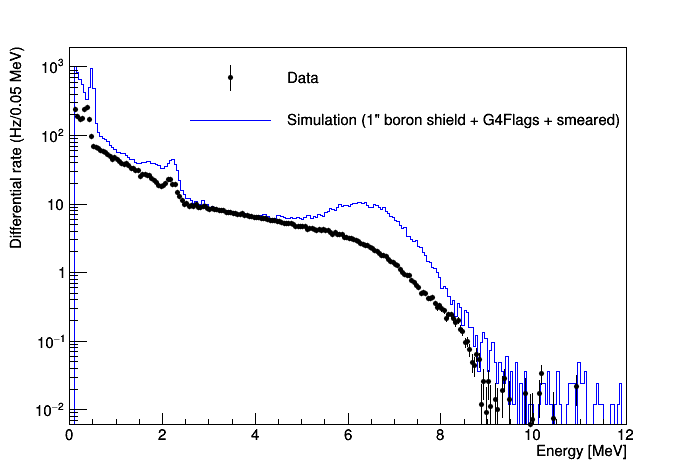

In [32]:
c = rt.TCanvas()
h_data.Draw()
h_data.SetMarkerStyle(rt.kFullCircle)
h_data.SetMarkerColor(rt.kBlack)
h_data.SetMarkerSize(0.6)
h_data.SetLineColor(rt.kBlack)
rt.gStyle.SetOptStat(0)
h_k100sim_bkg_NaI_Edep_all_smeared.SetLineColor(rt.kBlue)
h_k100sim_bkg_NaI_Edep_all_smeared.SetTitle("")
h_k100sim_bkg_NaI_Edep_all_smeared.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_all_smeared.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_all_smeared.Draw('hist')
h_data.Draw('same')

legend = rt.TLegend(0.25,0.88,0.9,0.7)
legend.SetTextSize(0.035)
legend.SetBorderSize(0)
legend.AddEntry(h_data,'Data','pe')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_smeared,'Simulation (1" boron shield + G4Flags + smeared)','l')
legend.Draw()

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()

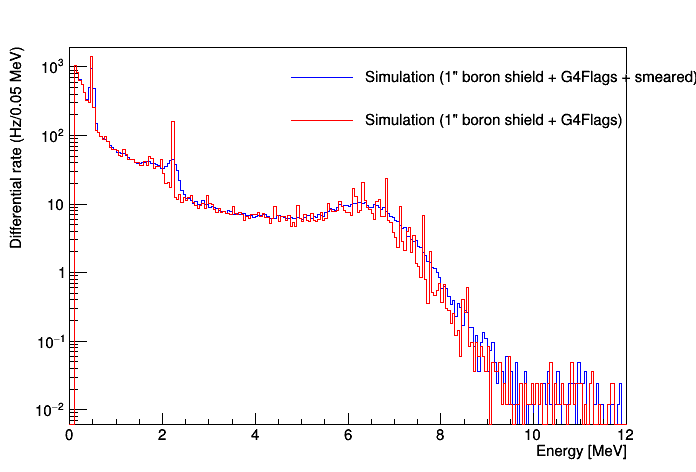

In [39]:
c = rt.TCanvas()

rt.gStyle.SetOptStat(0)

h_k100sim_bkg_NaI_Edep_all_smeared.SetLineColor(rt.kBlue)
h_k100sim_bkg_NaI_Edep_all_smeared.SetTitle("")
h_k100sim_bkg_NaI_Edep_all_smeared.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_all_smeared.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_all_smeared.Draw('hist')
h_k100sim_bkg_NaI_Edep_all_NoSmearing.SetLineColor(rt.kRed)
h_k100sim_bkg_NaI_Edep_all_NoSmearing.Draw('hist same')

legend = rt.TLegend(0.4,0.88,0.9,0.7)
legend.SetTextSize(0.035)
legend.SetBorderSize(0)
#legend.AddEntry(h_data,'Data','pe')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_smeared,'Simulation (1" boron shield + G4Flags + smeared)','l')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_NoSmearing,'Simulation (1" boron shield + G4Flags)','l')
legend.Draw()

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()

In [48]:
def calculate_trigger_smeared_PID_multiple(pids):
    print ('Calculating trigger rate...')
    triggered_events = 0
    up_thresholds = [round(i,3) for i in np.arange(0.15,12.,0.05)]
    low_thresholds = [round(i,3) for i in np.arange(0.1,11.95,0.05)]
    mid = [round(i,3) for i in np.arange(0.125,11.975,0.05)]
    triggered_list = {}
    n = len(mid)
    trig_event_list = np.zeros(n)
    skipped_events = 0
    for threshold in mid:
        triggered_list['%f'%(threshold)] = 0


    rand = rt.TRandom3()
    resoNaI = rt.TF1("resoNaI","0.05*x^(-0.25)+0.005",0.5,10)
    for i in tqdm(range(len(k100))):
        if(k100.nCapType.iloc[i] in pids):
            continue
#         if((128053 == k100.nCapType.iloc[i]) | (57026 == k100.nCapType.iloc[i]) | (24011 == k100.nCapType.iloc[i])):
#             continue
        temp_trigger = np.zeros(n)
        temp_veto = np.zeros(n)
        for energy in k100.tile_energy.iloc[i]:
            smear = resoNaI.Eval(energy)
            smeared_energy = rand.Gaus(energy,energy*smear)
            if(smeared_energy < 0):
                energy = 0.
            else:
                energy = smeared_energy
            veto = False
            trigger = False

            for j,threshold in enumerate(up_thresholds):
                
                if(energy > threshold):
                    temp_veto[j] = True
                elif(energy > low_thresholds[j]):
                    temp_trigger[j] = True

        for j in range(n):
            if(not temp_veto[j] and temp_trigger[j]):
                triggered_list['%f'%(mid[j])] += 1
            #triggered_events += 1
    #         print('%d : %f'%(i,energy))
    #         break
#         print ('event = ',i)
#         print ('tile_energy = ',k100.tile_energy.iloc[i])
#         print ('trigger = ',temp_trigger)
#         print ('veto = ',temp_veto)

    
    #print (triggered_list)
#     print('Total trigger events = %d'%(triggered_list['3.125']))
#     print('Total trigger rate = %f Hz'%(triggered_list['3.125']/0.218))
    print('Skipped events = ',skipped_events)
    livetime = (events_in_this_sim - skipped_events) * (21.8/50e6)
    print ('Full livetime = %0.4f sec'%(events_in_this_sim*((21.8/50e6))))
    print ('After removal livetime = %0.4f sec'%(livetime))
    x = np.zeros(n)
    y = np.zeros(n)
    erry = np.zeros(n)
    for i,j in enumerate(triggered_list.keys()):
        x[i] = float(j)
        y[i] = (triggered_list[j])/livetime
        
        erry[i] = np.sqrt(triggered_list[j])/livetime
    return np.c_[np.c_[x,y],erry]

Calculating trigger rate...


  0%|                                                                                                                                                                                                | 0/1200635 [00:00<?, ?it/s]/var/folders/x7/33tkj9dx0bzcnj7gh4sb5tlc0000gn/T/ipykernel_19846/4275988425.py:26: RuntimeWarning: invalid value encountered in double_scalars
  smeared_energy = rand.Gaus(energy,energy*smear)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1200635/1200635 [01:25<00:00, 14098.35it/s]


Skipped events =  0
Full livetime = 82.8400 sec
After removal livetime = 82.8400 sec


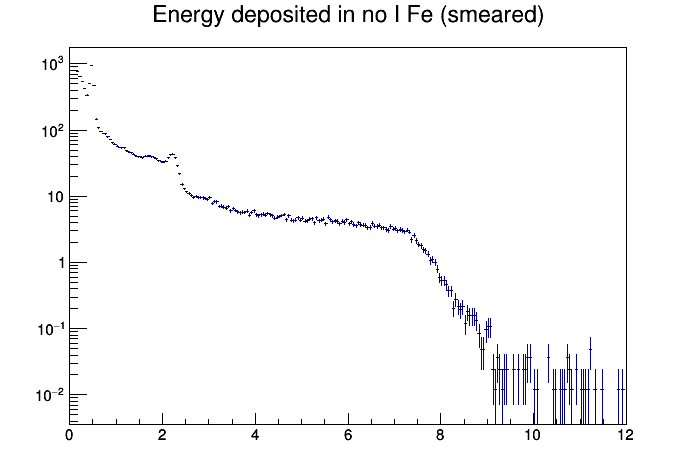

In [50]:
trigger_rate_smeared_I = calculate_trigger_smeared_PID_multiple([128053])

Warning in <TROOT::Append>: Replacing existing TH1: h_k100sim_bkg_NaI_Edep_sansI127_smeared (Potential memory leak).


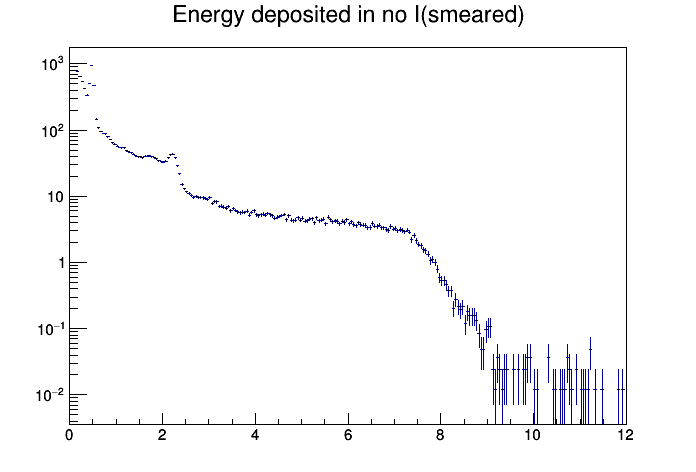

In [51]:
h_k100sim_bkg_NaI_Edep_sansI127_smeared = rt.TH1F("h_k100sim_bkg_NaI_Edep_sansI127_smeared","Energy deposited in no I(smeared)",240,0,12)
h_k100sim_bkg_NaI_Edep_sansI127_smeared.Sumw2()
h_k100sim_bkg_NaI_Edep_sansI127_smeared = makeHistogram(h_k100sim_bkg_NaI_Edep_sansI127_smeared,trigger_rate_smeared_I)
c = rt.TCanvas()
h_k100sim_bkg_NaI_Edep_sansI127_smeared.Draw()
rt.gPad.SetLogy()
c.Draw()

In [52]:
trigger_rate_smeared_I_Fe = calculate_trigger_smeared_PID_multiple([128053,57026])

Calculating trigger rate...


  0%|                                                                                                                                                                                                | 0/1200635 [00:00<?, ?it/s]/var/folders/x7/33tkj9dx0bzcnj7gh4sb5tlc0000gn/T/ipykernel_19846/4275988425.py:26: RuntimeWarning: invalid value encountered in double_scalars
  smeared_energy = rand.Gaus(energy,energy*smear)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1200635/1200635 [01:24<00:00, 14185.24it/s]


Skipped events =  0
Full livetime = 82.8400 sec
After removal livetime = 82.8400 sec


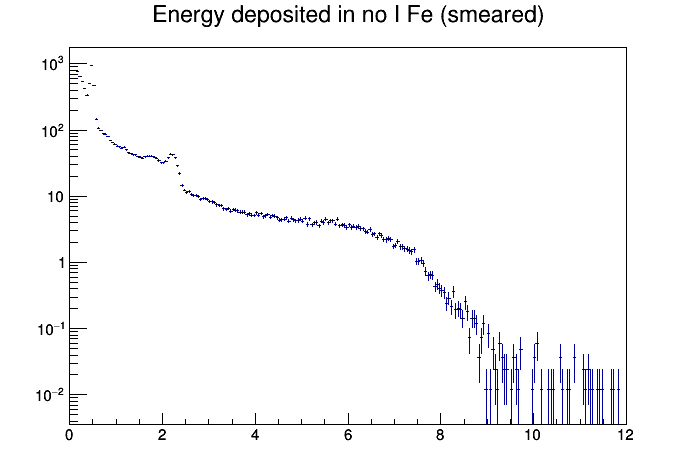

In [53]:
h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared = rt.TH1F("h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared","Energy deposited in no I Fe (smeared)",240,0,12)
h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared.Sumw2()
h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared = makeHistogram(h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared,trigger_rate_smeared_I_Fe)
c = rt.TCanvas()
h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared.Draw()
rt.gPad.SetLogy()
c.Draw()

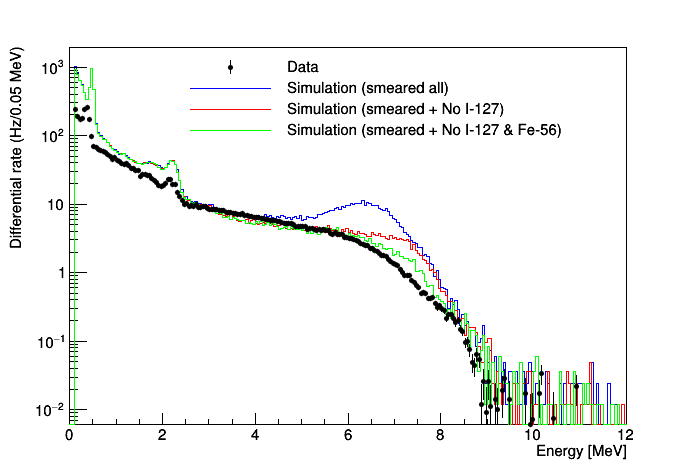

In [57]:
c = rt.TCanvas()
h_data.Draw()
h_data.SetMarkerStyle(rt.kFullCircle)
h_data.SetMarkerColor(rt.kBlack)
h_data.SetMarkerSize(0.6)
h_data.SetLineColor(rt.kBlack)
rt.gStyle.SetOptStat(0)

h_k100sim_bkg_NaI_Edep_all_smeared.SetLineColor(rt.kBlue)
h_k100sim_bkg_NaI_Edep_all_smeared.SetTitle("")
h_k100sim_bkg_NaI_Edep_all_smeared.GetXaxis().SetTitle('Energy [MeV]')
h_k100sim_bkg_NaI_Edep_all_smeared.GetYaxis().SetTitle('Differential rate (Hz/0.05 MeV)')
h_k100sim_bkg_NaI_Edep_all_smeared.Draw('hist')

h_k100sim_bkg_NaI_Edep_sansI127_smeared.SetLineColor(rt.kRed)
h_k100sim_bkg_NaI_Edep_sansI127_smeared.Draw('hist same')

h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared.SetLineColor(rt.kGreen)
h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared.Draw('hist same')

# h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared.SetLineColor(rt.kGreen)
# h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared.Draw('hist same')

h_data.Draw('same')

legend = rt.TLegend(0.25,0.88,0.9,0.7)
legend.SetTextSize(0.035)
legend.SetBorderSize(0)
legend.AddEntry(h_data,'Data','pe')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_all_smeared,'Simulation (smeared all)','l')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_sansI127_smeared,'Simulation (smeared + No I-127)','l')
legend.AddEntry(h_k100sim_bkg_NaI_Edep_No_I_Fe_smeared,'Simulation (smeared + No I-127 & Fe-56)','l')
#legend.AddEntry(h_k100sim_bkg_NaI_Edep_No_I_Na_Fe_smeared,'Simulation (smeared + No_I_Na_Fe)','l')

legend.Draw()

#h_k100sim_bkg_NaI_Edep_all_zoomed.GetXaxis().SetRangeUser(0,8)
rt.gPad.SetLogy()
c.Draw()